## 165 - Using XArray to Subset in Lat/Lon and Map the GFS


[Youtube](https://www.youtube.com/watch?v=FdYUT-w3uPw)

In [1]:
from siphon.catalog import TDSCatalog
import xarray as xr
import metpy

In [2]:
best_gfs = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg_ana/latest.xml')
best_ds = best_gfs.datasets[0]
ds = xr.open_dataset(best_ds.access_urls['OPENDAP']).sel(lon = slice(360 - 150, 360 - 50, 2), lat = slice(65, 20, 2))

In [3]:
data_var = ds.metpy.parse_cf('Relative_humidity_zeroDegC_isotherm')
data_var

<xarray.DataArray 'Relative_humidity_zeroDegC_isotherm' (time: 12, lat: 91,
                                                         lon: 201)>
[219492 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 65.0 64.5 64.0 63.5 63.0 ... 21.5 21.0 20.5 20.0
  * lon        (lon) float32 210.0 210.5 211.0 211.5 ... 308.5 309.0 309.5 310.0
  * time       (time) datetime64[ns] 2023-01-13 ... 2023-01-15T18:00:00
    reftime    (time) datetime64[ns] ...
    metpy_crs  object Projection: latitude_longitude
Attributes: (12/13)
    long_name:                       Relative humidity @ Level of 0 °C isotherm
    units:                           %
    abbreviation:                    RH
    grid_mapping:                    LatLon_Projection
    Grib_Variable_Id:                VAR_7-0--1-1_L4
    Grib2_Parameter:                 [0 1 1]
    ...                              ...
    Grib2_Parameter_Category:        Moisture
    Grib2_Parameter_Name:            Relative humidity
    Grib2_Level_Type:                4
    Grib2_Level_Desc:                Level of 0 °C isotherm
    Grib2_Generating_Process_Type:   Analysis
    Grib2_Statistical_Process_Type:  UnknownStatType--1

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cfeature
%matplotlib inline

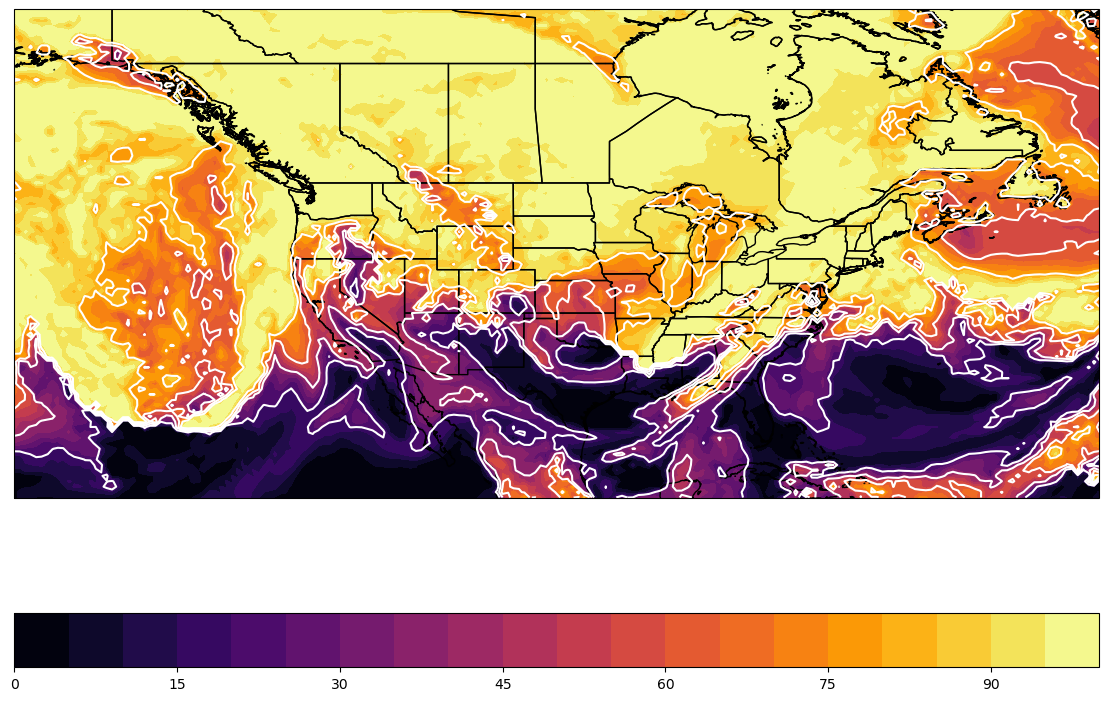

In [5]:
fig = plt.figure(figsize = (14, 10))
ax = fig.add_subplot(1, 1, 1, projection = data_var.metpy.cartopy_crs)
cf = ax.contourf(data_var.lon, data_var.lat, data_var.isel(time = 0), levels = np.arange(0, 101, 5), cmap = 'inferno')
ax.contour(data_var.lon, data_var.lat, data_var.isel(time = 0), colors = 'white', levels = np.arange(0, 110, 20))
ax.coastlines(color = 'black', resolution = '10m')
ax.add_feature(cfeature.STATES.with_scale('50m'))
plt.colorbar(cf, orientation = 'horizontal')